<a href="https://colab.research.google.com/github/Coralain10/wv71_tf_202010279_202017572_201319550/blob/main/Trabajo_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de adyacencia entre nodos vecinos

In [1]:
'''
56 57 58 59 60 61 62 63
48 49 50 51 52 53 54 55
40 41 42 43 44 45 46 47
32 33 34 35 36 37 38 39
24 25 26 27 28 29 30 31
16 17 18 19 20 21 22 23
 8  9 10 11 12 13 14 15
 0  1  2  3  4  5  6  7

xy
07 17 27 37 47 57 67 77
06 16 26 36 46 56 66 76
05 15 25 35 45 55 65 75
04 14 24 34 44 54 64 74
03 13 23 33 43 53 63 73
02 12 22 32 42 52 62 72
01 11 21 31 41 51 61 71
00 10 20 30 40 50 60 70

32 => 3+2*8
ngrafo = y*ancho + x

00 | 01 10 => 0 | 1 8
0+1<n 0-1>0 0+ancho<n 0-ancho>0 

32 | 33 31 22 42 => 19 | 27 11 18 20
19+1<n 19-1>0 19+ancho<n 19-ancho>0 

77 | 76 67 => 63 | 55 62
63+1<n 63-1>0 63+ancho<n 63-ancho>0 
'''
''

''

## Función para unir nodos vecinos
* Une los vecinos de abajo, izquierda, derecha y arriba
* Los nodos se cuentan desde la esquina inferior izquierda hacia la esquina superior derecha.
* Se leen de izquierda a derecha y de abajo a arriba.

In [2]:
def setGraphByWH(w,h): # width height
  n = w*h
  G = [ [] for _ in range(n) ]
  for i, u in enumerate(G):
    if i - w >= 0 : u.append(i - w)
    if i - 1 >= 0 : u.append(i - 1)
    if i + 1  < n : u.append(i + 1)
    if i + w  < n : u.append(i + w)
  return G

def setGraphByWH2(w,h): #v2 # width height
  n = w*h
  G = []
  for i in range(n):
    u = []
    if i - w >= 0 : u.append(i - w)
    if i - 1 >= 0 : u.append(i - 1)
    if i + 1  < n : u.append(i + 1)
    if i + w  < n : u.append(i + w)
    G.append(u)
  return G

In [3]:
#%timeit setGraphByWH(7000,7000)
#%timeit setGraphByWH2(7000,7000) #7000 x 7100 no

side = 1000 #ancho y alto de la ciudad
G = setGraphByWH(side,side)

In [4]:
fileG = open("lista_adyacencia.csv","w")
for u in G:
  fileG.write(str(u)[1:-1] + '\n')
fileG.close() #to change file access modes

## Funcion para diferenciar los nodos (v1)
* Todos los nodos inician con x, y 
* Los nodos de distribución terminan en D
* Los nodos de entrega terminan en E

In [5]:
# width height delivery_points[(x,y)], distribution_points[(x,y)] 
# Solo modificar los labels
def setLabelsByPoints(G,deps,dips,w=None):
  n = len(G)
  if w == None: w = int(n**(1/2)) #10 | 2,1
  labels = [f'{i%w},{i//w}' for i in range(n)] #x,y
  for v in deps:
    x, y = v[0], v[1]
    pos = y*w + x
    labels[pos] = f'{x},{y} E'
  for v in dips:
    x, y = v[0], v[1]
    pos = y*w + x
    labels[pos] = f'{x},{y} D'
  return labels

## Funcion para diferenciar los nodos (v2)
* **w** es el ancho de la ciudad.
* La posición **i** del nodo en x,y es $i = y \cdot w + x$ .
* La posición **(x,y)** del nodo i se encuentra en $x = i\%w $ y en $y = i//w$.
* Solo se consideran los nodos de distribución y de entrega.

In [6]:
def getNodesByXYs(xyl, w): #xylist [(x,y),(x,y),...]
  return [xy[1]*w + xy[0] for xy in xyl]

def getXYsByNodes(nl, w):
  return [ (i%w , i//w) for i in nl ]

# Agregar la información de los datasets
* [x] Agregar la información de dataset de almacenes.csv.
* [x] Agregar la información de dataset de puntos_entrega.csv.

In [7]:
!wget https://raw.githubusercontent.com/Coralain10/wv71_tf_202010279_202017572_201319550/main/dataset/almacenes.csv -P dataset/
!wget https://raw.githubusercontent.com/Coralain10/wv71_tf_202010279_202017572_201319550/main/dataset/puntos_entrega.csv -P dataset/

--2021-11-27 04:45:58--  https://raw.githubusercontent.com/Coralain10/wv71_tf_202010279_202017572_201319550/main/dataset/almacenes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 695 [text/plain]
Saving to: ‘dataset/almacenes.csv’

almacenes.csv       100%[===================>]     695  --.-KB/s    in 0s      

2021-11-27 04:45:58 (35.2 MB/s) - ‘dataset/almacenes.csv’ saved [695/695]

--2021-11-27 04:45:58--  https://raw.githubusercontent.com/Coralain10/wv71_tf_202010279_202017572_201319550/main/dataset/puntos_entrega.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP reques

In [8]:
def fileXYtoLst(fname):
  xys = []
  with open(fname) as f:
    for line in f:
      xys.append( tuple( map(int,line.strip().split(','))) )
  return xys

almacenes_xys = fileXYtoLst("dataset/almacenes.csv")
entrega_xys = fileXYtoLst("dataset/puntos_entrega.csv")

In [9]:
almacenes_nodes = getNodesByXYs(almacenes_xys, side)
entrega_nodes = getNodesByXYs(entrega_xys, side)

In [10]:
'''import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.grid(color='#AAAAAA', linestyle='-', linewidth=1)
plt.scatter( *zip(*almacenes_xys), s=100, color="#ff9654", label="Puntos de distibucion")
plt.scatter( *zip(*entrega_xys), s=100, color="#34c0eb", label="Puntos de Entrega")
plt.xlabel("X")
plt.ylabel("Y")
for xy in almacenes_xys:
  plt.annotate(None,(xy[0], xy[1]))
for xy in entrega_xys:
  plt.annotate(None,(xy[0], xy[1]))
plt.legend()
plt.xlim([0, side])
plt.ylim([0, side])
plt.show()'''

'import matplotlib.pyplot as plt\nplt.figure(figsize=(50,50))\nplt.grid(color=\'#AAAAAA\', linestyle=\'-\', linewidth=1)\nplt.scatter( *zip(*almacenes_xys), s=100, color="#ff9654", label="Puntos de distibucion")\nplt.scatter( *zip(*entrega_xys), s=100, color="#34c0eb", label="Puntos de Entrega")\nplt.xlabel("X")\nplt.ylabel("Y")\nfor xy in almacenes_xys:\n  plt.annotate(None,(xy[0], xy[1]))\nfor xy in entrega_xys:\n  plt.annotate(None,(xy[0], xy[1]))\nplt.legend()\nplt.xlim([0, side])\nplt.ylim([0, side])\nplt.show()'

# Algoritmo de Dijkstra

In [11]:
import math
import heapq as hq
import numpy as np

In [12]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [None]*n
  cost = [math.inf]*n
  cost[s] = 0
  queue = [(0, s)]
  while queue:
    g_u, u = hq.heappop(queue)
    if not visited[u]:
      visited[u] = True
      for v in G[u]:
        f = g_u + 1
        if f < cost[v]:
          cost[v] = f
          path[v] = u
          hq.heappush(queue, (f, v))

  return path, cost

In [13]:
path, cost = dijkstra(G, 0)

## Dijkstra para cada punto de distribucion (v1)

In [14]:
def dijkstrapd(dis, entrega, G):
  res=[] 
  def dijkstrav2(G, s):
    n = len(G)
    visited = [False]*n
    path = [None]*n
    cost = [math.inf]*n
    cost[s] = 0
    queue = [(0, s)]
    while queue:
      g_u, u = hq.heappop(queue)
      if  not visited[u]: #
        visited[u] = True
        for v in G[u]:
          f = g_u + 1
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(queue, (f, v))
    return path, cost

  for i in dis:
    l1, l2 = dijkstrav2(G,i)
    for j in entrega:
      k = j
      p = [j]
      c = l2[j]
      while k!=i:
        k=l1[k]
        p.append(k)
      p.reverse()
      res.append((i,j,c,p)) #formato de la lista resultante: (nodo de distribucion i, nodo de entrega j, cost, path)
  return res

In [15]:
#djpd = dijkstrapd(almacenes_nodes, entrega_nodes,G)
#se omitirá la ejecución del algoritmo de Dijkstra dado
#al alto consumo de recursos que genera al recorrer todos los nodos

In [16]:
def showDj1(l:list, qv=10, qh=10):
  qv = min( len(l), qv )
  qh = min( len(l[0][-1]), qh )
  for i in range(qv):
    print( l[i][0], l[i][1], l[i][2], 
          str(l[i][3][:qh])[:-1], '...]', sep = ',' )
  print('...')
#showDj1(djpd)

#Algoritmos

In [17]:
def distancia(p1, p2):
  x1, y1 = p1
  x2, y2 = p2
  # return math.sqrt((x2-x1)**2+(y2-y1)**2)
  return abs(x2-x1)+abs(y2-y1)

def getnodo(p, side):
  x, y = p
  return y*side + x

In [18]:
def asignacion(dist, ent):
  res = [] # [[dist1, emt1, ent2, entn],[dist2, ent1, ent2, entn],...]
  for i in dist:
    l = [getnodo(i,side)]
    for j in ent:
      if distancia(i,j)<=50:
        l.append(getnodo(j,side))
    res.append(l)
  return res

In [19]:
dist = fileXYtoLst("dataset/almacenes.csv")
ent = fileXYtoLst("dataset/puntos_entrega.csv")

In [20]:
l = asignacion(dist,ent)

In [21]:
def separacion(l):
  l1 = []
  l2 = []
  l3 = []
  for i in l:
    if len(i)<11:
      l1.append(i)
    elif len(i)>=11 and len(i)<25:
      l2.append(i)
    else:
      l3.append(i)
  return l1,l2,l3

In [22]:
d, c, j = separacion(l)

In [60]:
#@title Creando los grupos a partir de la distancia entre los nodos
def getGroups():
  na = len(almacenes_xys)
  ne = len(entrega_xys)
  group = [-1]*ne
  for i in range(ne):
    m = 0
    d = distancia(entrega_xys[i],almacenes_xys[0])
    for j in range(1,na):
      d2 = distancia(entrega_xys[i],almacenes_xys[j])
      if d2 < d:
        d = d2
        m = j
    group[i] = m
  
  groupsNs = {}
  for i, gr in enumerate(group):
    #del numero de grupo recogemos las posiciones
    groupsNs[gr] = groupsNs.get(gr,[almacenes_xys[gr]]) + [entrega_xys[i]]
  
  #ngroups = len(groupsNs.keys())
  #print(len(groupsNs.keys()))
  return groupsNs

In [61]:
#@markdown Asignando los grupos acorde a los algoritmos
groupsD = getGroups()
dgs, cgs, jgs = [], [], []
for v in groupsD.values():
  nv = len(v)
  if nv < 11: dgs.append(v) #Fuerza bruta
  elif nv < 30: jgs.append(v) #Greedy
  else: cgs.append(v) #Greedy
#len(list(filter(lambda x: len(x)< 30, groupsD.values())))
#len(groupsD)
print(len(dgs),len(cgs),len(jgs))

4 48 37


##Algoritmo Diego (Fuerza bruta)

In [24]:
from itertools import permutations

In [25]:
def distanciacuadras(n1, n2):
  m1 = n1//1000
  m2 = n2//1000
  dist = 0
  while n1!=n2:
    if m1>m2:
      n1-=1000
      m1-=1
    elif m2>m1:
      n1+=1000
      m1+=1
    else:
      if n1>n2:
        n1-=1
      if n2>n1:
        n1+=1
    dist+=1
  return dist

def tsp(l):
  l2 = l.copy()
  inicio = l2.pop(0)
  permutaciones = list(permutations(l2))
  res = []
  dist = float('inf')
  for i in permutaciones:
    d = distanciacuadras(inicio, i[0])
    for j in range(1, len(i)):
      d += distanciacuadras(i[j],i[j-1])
    d += distanciacuadras(inicio,i[len(i)-1])
    if d<dist:
      res=list(i)
      dist=d
  res.insert(0,inicio)
  res.append(inicio)
  return res, dist

In [26]:
def algoritmoD(d):
  for i in d:
    l, dist = tsp(i)
    print(f'Desde el punto de distribución {i.pop(0)} un carro entrego pedidos a los puntos de entrega: {i}, recorriendo {dist} cuadras, por la ruta: {l}')

In [ ]:
algoritmoD(d)

##Algoritmo Carolain

## Algoritmo Greedy del Vecino más cercano (Nearest neighbour)

In [72]:
#cgs
def nearest_neighbour_1(group:list):
  n = len(group)
  path = [None]*n
  visited = [False]*n
  #el punto de almacén se encuentra en el nodo 0
  visited[0] = True #el visitado es 1ero
  lastV = 0 #último nodo visitado
  nV = 0 #número de nodos ya visitados
  cost = 0
  
  while nV < n-1:
    neighbours = []
    for i, v in enumerate(visited): #solo de aquellos aun no visitados
      if not v: neighbours.append( (i, group[i]) ) #tambien guardamos su índice
    #print(neighbours)

    #asumimos que el primero es el mínimo
    #(índice en el grupo, distancia al ultimo visitado)
    nearest = (neighbours[0][0], distancia(group[lastV],neighbours[0][1]) )
    #calculamos la distancia mínima
    for ig, posN in neighbours:
      if (nearest[1] > distancia(group[lastV], posN) ):
        nearest = (ig, distancia(group[lastV], posN) )
    
    #llenamos los datos del más cercano
    #podemos guardar el indice lastV o la posición xy
    #para mejor representación, será en xy
    path[nearest[0]] = group[lastV] #nodo anterior 
    visited[ nearest[0] ] = True
    lastV = nearest[0]
    nV += 1
    cost += nearest[1]
  
  #Agregamos el costo del último nodo visitado al primero
  cost += distancia(group[lastV], group[0])
  path[0] = group[lastV]

  return path, cost

In [107]:
#cgs
def nearest_neighbour_2(group:list):
  n = len(group)
  #guardaremos los nodos en orden de visitado
  #el punto de almacén se encuentra en el nodo 0
  path = [group[0]] #y es el primero del camino
  #neighbours referencia a los elementos de group
  #omitiendo el nodo 0 ya que se considera visitado
  neighbours = group[1:]
  cost = 0
  
  while neighbours:
    # (índice en neighbours, distancia)
    nearest = (-1, float('inf') )
    #calculamos la distancia mínima
    for i, node in enumerate(neighbours):
      #path[-1] guarda al último visitado
      if (nearest[1] > distancia(path[-1], node) ):
        nearest = (i, distancia(path[-1], node))
    
    #Agregamos al camino el último visitado
    path.append( neighbours[nearest[0]] )
    #omitimos la referencia al vecino que se acaba de visitar
    neighbours = neighbours[:nearest[0]] + neighbours[nearest[0]+1:]
    cost += nearest[1] #agregamos el costo
  
  #Agregamos el costo del último nodo visitado al primero
  cost += distancia(path[-1], group[0])
  path.append(group[0]) #el nodo final es el nodo inicial

  return path, cost

In [98]:
#comprobamos en el 1er grupo
#display(nearest_neighbour_1(cgs[0]))
%timeit nearest_neighbour_1(cgs[0])
%timeit nearest_neighbour_2(cgs[0])

1000 loops, best of 5: 1.05 ms per loop
1000 loops, best of 5: 806 µs per loop


In [108]:
#Por razones de eficiencia, se utilizará la versión 2 de nearest_neighbour
#aplicamos en todos los grupos
nC = len(cgs)
nearest_neighbours = [None] * nC
for i, group in enumerate(cgs):
  nearest_neighbours[i] = nearest_neighbour_2(group)
#display(nearest_neighbours)

In [109]:
#Guardaremos en un archivo los caminos
f = open("nearest_neighbours.txt", "w")
txt ='\n'.join([str(nn)[1:-1] for nn in nearest_neighbours])
f.writelines(txt)
f.close()

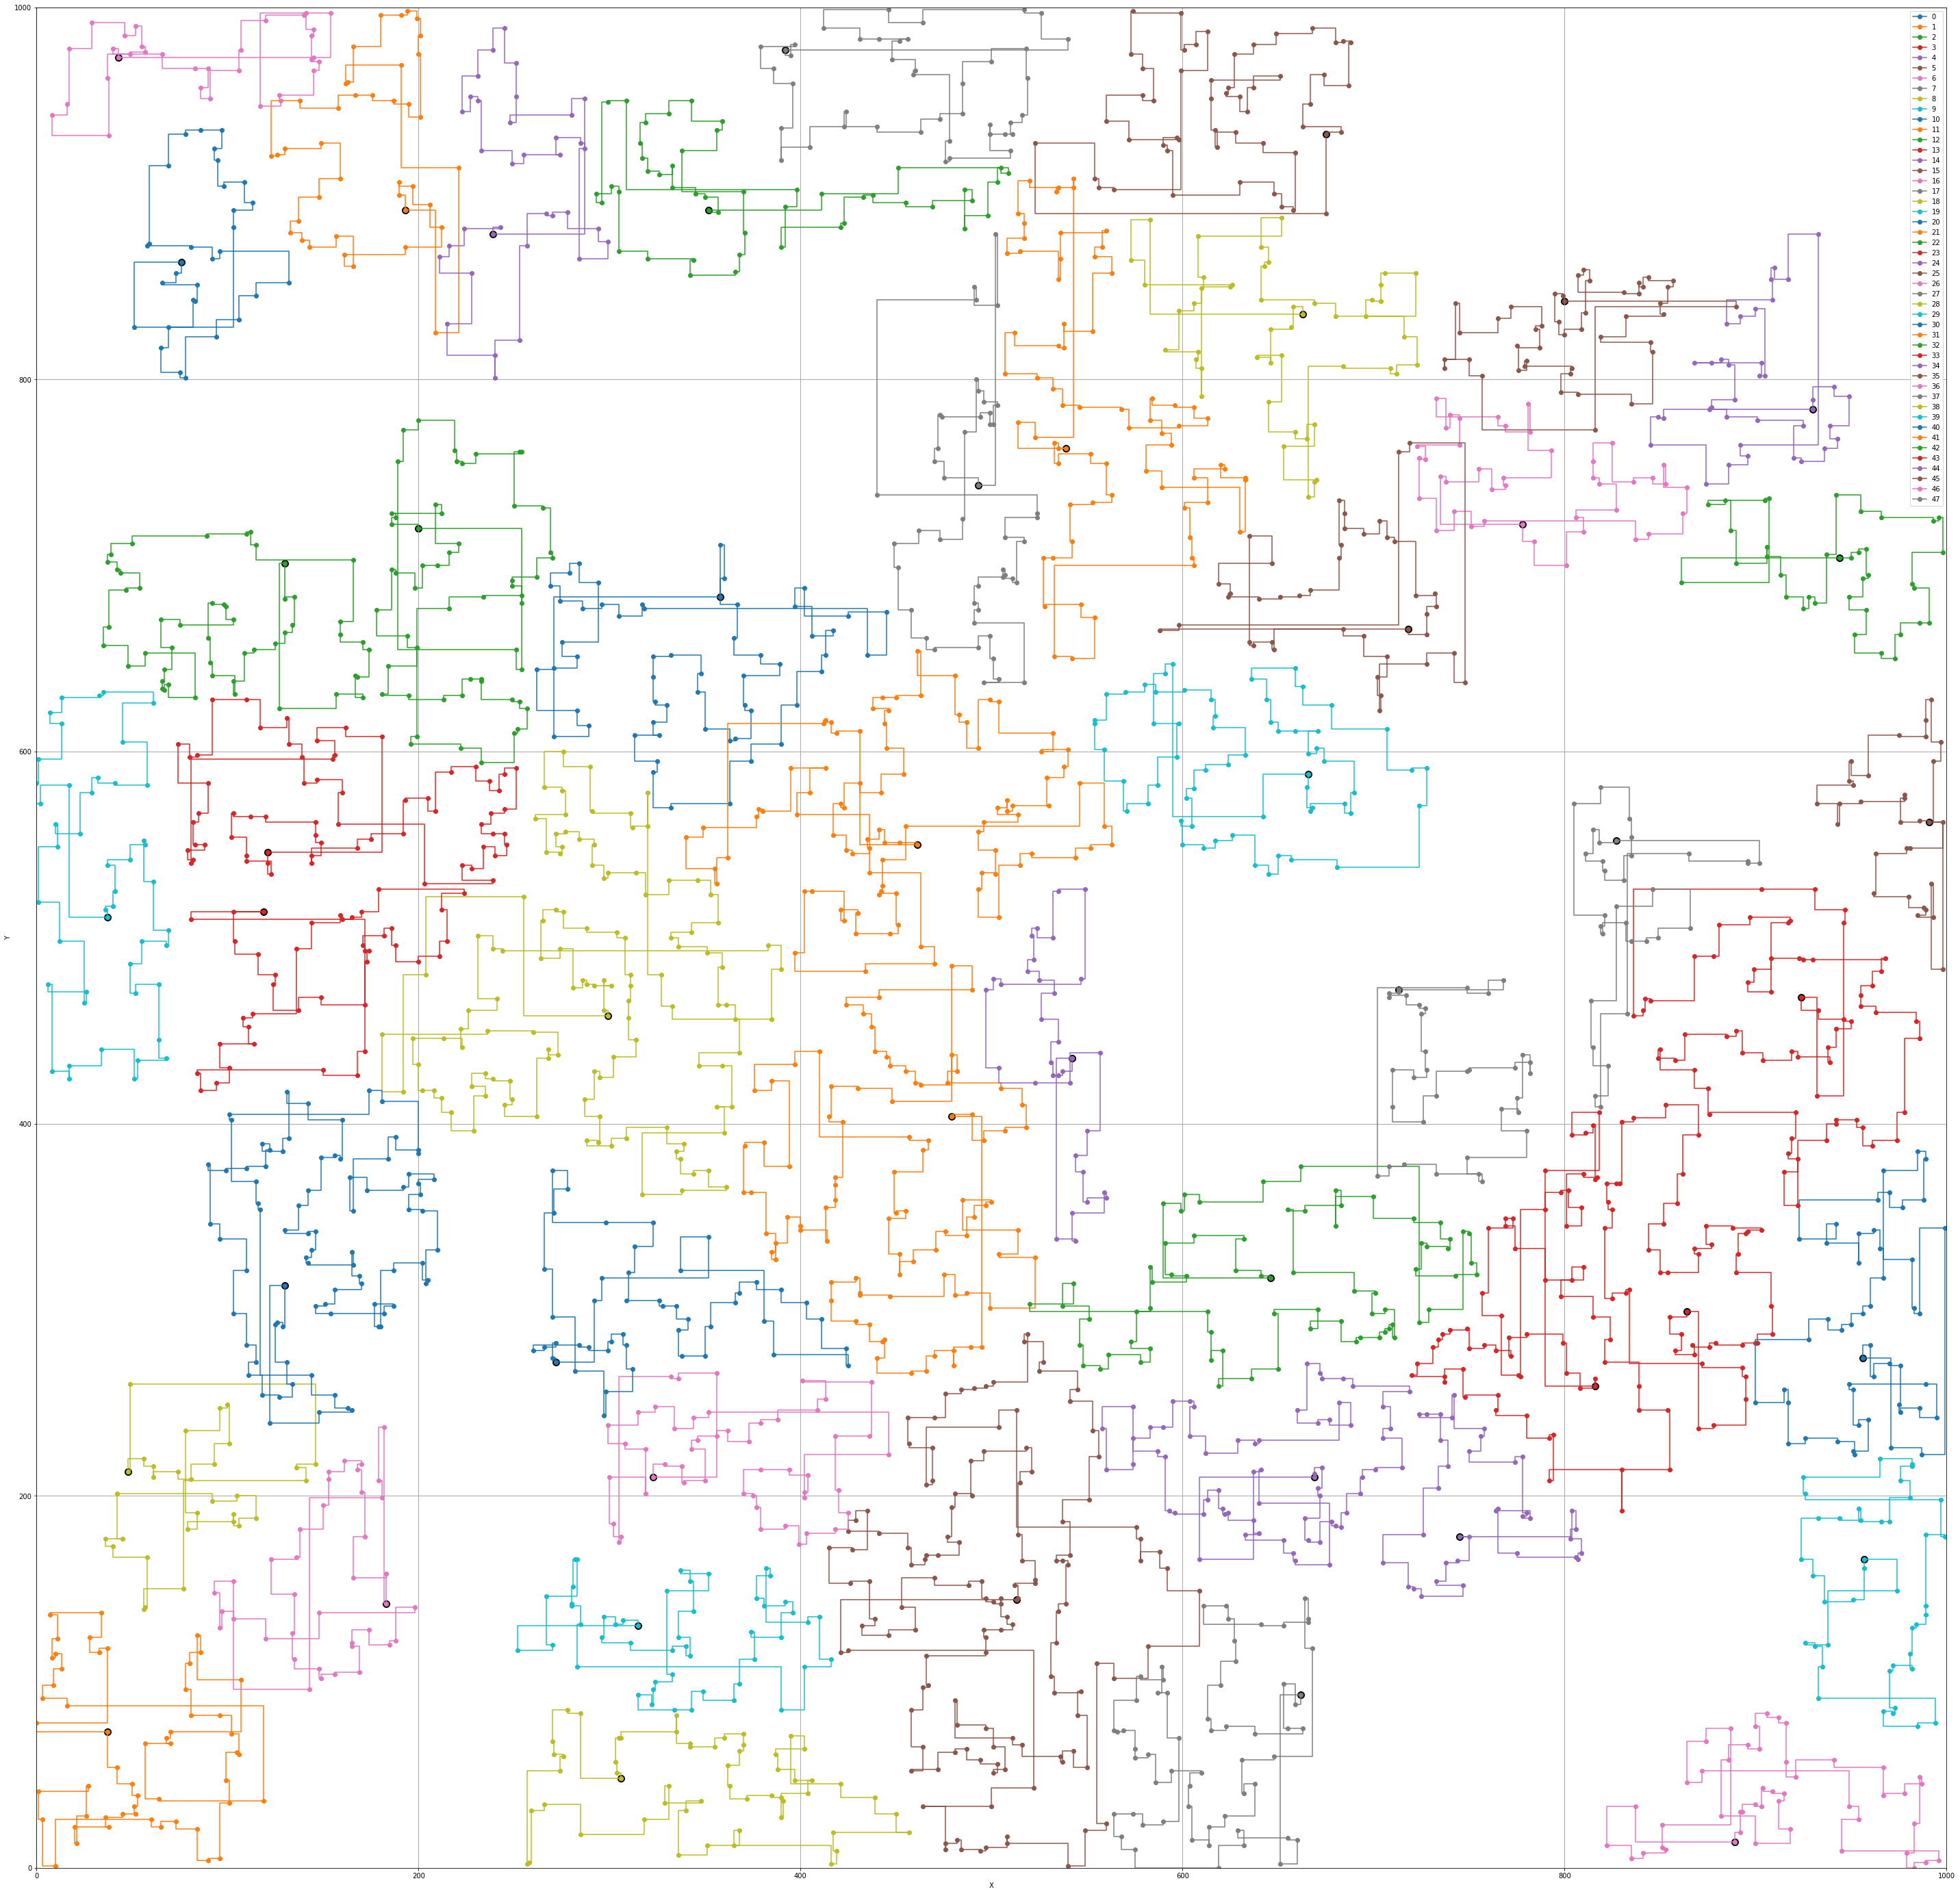

In [111]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50,50))
plt.grid(color='#AAAAAA', linestyle='-', linewidth=1)

for i, neighbour in enumerate(nearest_neighbours): #rutas
  nr = len(neighbour[0])
  xs, ys = [None]*nr , [None]*nr
  for j, v in enumerate(neighbour[0]): #por cada punto de la ruta
    xs[j], ys[j] = v
  #plt.scatter( *zip(*neighbour[0]), s=100, color="#ff9654", label=f"{i}",linewidths=1)
  #plt.plot(xs, ys, '-o', linewidth=2.0)
  #plt.step(xs, ys, '-o', label=f'{i}')
  plt.plot(xs, ys, '-o', drawstyle='steps', label=f'{i}')
  plt.scatter( xs[0], ys[0], s=100, color="#000000")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.xlim([0, side])
plt.ylim([0, side])
plt.show()

##Algoritmo Julio